In [33]:
pip install fdtd


In [48]:
import fdtd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import copy
import math
# pytorch imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
import time


In [49]:
fdtd.set_backend("torch")

In [50]:
fdtd.__file__

'C:\\Users\\zwdzw\\anaconda3\\lib\\site-packages\\fdtd\\__init__.py'

In [51]:
p_mat=torch.ones(10,10,1, requires_grad = True)*1.5
#p_mat.retain_graph=True
p_mat2=torch.ones(10,10)*1.2
#p_mat=p_mat.reshape(10,10,1)
p_mat2=p_mat2.reshape(10,10,1)

In [52]:
def grid_setup_run( mat=p_mat,t=100):
    grid=fdtd.Grid(
    shape=(100,300,1),
    grid_spacing= 1,
    permittivity= 1.0,
    permeability= 1.0,
    #courant_number: float = None,
)
    grid[60:70, 60:70, 0] = fdtd.Object(permittivity=p_mat, name="object1")
    grid[50, 50, 0]=fdtd.PointSource( name="object4")
    grid[70,70,0]=fdtd.CurrentDetector(name="detector1")
    grid[0:10, :, :] = fdtd.PML(name="pml_xlow")
    grid[-10:, :, :] = fdtd.PML(name="pml_xhigh")
    grid[:, 0:10, :] = fdtd.PML(name="pml_ylow")
    grid[:, -10:, :] = fdtd.PML(name="pml_yhigh")
    grid.run(total_time=t)
    #grid.visualize(z=0)
    out=grid.detector1.detector_values()
    out=torch.tensor(out["I"])
    out=out.reshape(t)
    return out

100%|██████████| 100/100 [00:00<00:00, 154.76it/s]


RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

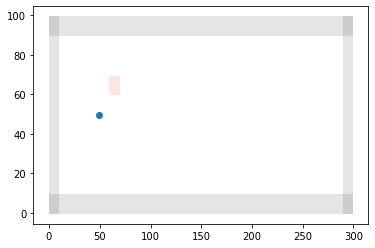

In [53]:
out=grid_setup_run(p_mat,100)
grid.visualize(z=0)

In [8]:
out = out["I"]

In [9]:
a1 = torch.tensor(0, dtype = torch.float64)
for o in out:
    a1 += o[0][0][0]**2

In [10]:
a1.backward()

In [17]:
p_mat.retain_graph

True

In [18]:
print(p_mat.grad)

None


In [19]:
a1=sum(out**2)
a2=sum(abs(out))
print(a1)
print(a2)

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In [21]:
#out=grid_setup_run(p_mat,300)
a1=sum(out**2)
a1=a1.reshape(1)
print(target.size())
print(a1.size())
loss = criterion(a1, target)
# print(loss)
# loss.requires_grad = True
# loss.backward()
# optimizer.step()
# print(loss)

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In [20]:
#p_mat=torch.ones(10,10)*1.5
p_mat=torch.ones((10,10,1), dtype=torch.float64,requires_grad=True)*1.5
target=torch.tensor([1.5],dtype=torch.float64)
criterion=nn.MSELoss()
import torch.optim as optim
optimizer = torch.optim.Adam([p_mat], lr=0.01, betas=(0.9, 0.999), eps=1e-07, weight_decay=0.0001)  #adam optimizer
    
for i in range(10):
    optimizer.zero_grad()   # zero the gradient buffers
    out=grid_setup_run(p_mat,300)
    a1=sum(out**2)
    a1=a1.reshape(1)
    loss = a1-target
    print(loss)
    loss.requires_grad = True
    loss.backward()
    optimizer.step()
    
    print(loss)
    #print(X)
    #print(M)


ValueError: can't optimize a non-leaf Tensor

In [ ]:
p_mat=torch.ones((10,10,1), dtype=torch.float64,requires_grad=True)*1.5
print(p_mat)
target=torch.tensor([1.5],dtype=torch.float64)
torch.autograd.grad()

In [ ]:
out1=grid.detector1.detector_values()
print(type(out1["I"]))
print(len(out1["I"]))
print(type(out1["I"][1]))
detector_out=torch.tensor(out1["I"])
t1=torch.zeros(100)
detector_out=detector_out.reshape_as(t1)
print(detector_out.size())
print(detector_out**2)

In [ ]:
grid.detector2.detector_values()

In [ ]:
grid[70:71,70:71,0]=fdtd.LineDetector(name="detector2")

In [ ]:
data = np.load('detector_readings.npz')


In [ ]:
grid.

In [ ]:
grid.update_H()
print(grid)

In [ ]:
def curl_E(E):
    curl_E = np.zeros(E.shape)
    curl_E[:,:-1,:,0] += E[:,1:,:,2] - E[:,:-1,:,2]
    curl_E[:,:,:-1,0] -= E[:,:,1:,1] - E[:,:,:-1,1]

    curl_E[:,:,:-1,1] += E[:,:,1:,0] - E[:,:,:-1,0]
    curl_E[:-1,:,:,1] -= E[1:,:,:,2] - E[:-1,:,:,2]

    curl_E[:-1,:,:,2] += E[1:,:,:,1] - E[:-1,:,:,1]
    curl_E[:,:-1,:,2] -= E[:,1:,:,0] - E[:,:-1,:,0]
    return curl_E

In [ ]:
def curl_H(H):
    curl_H = np.zeros(H.shape)

    curl_H[:,1:,:,0] += H[:,1:,:,2] - H[:,:-1,:,2]
    curl_H[:,:,1:,0] -= H[:,:,1:,1] - H[:,:,:-1,1]

    curl_H[:,:,1:,1] += H[:,:,1:,0] - H[:,:,:-1,0]
    curl_H[1:,:,:,1] -= H[1:,:,:,2] - H[:-1,:,:,2]

    curl_H[1:,:,:,2] += H[1:,:,:,1] - H[:-1,:,:,1]
    curl_H[:,1:,:,2] -= H[:,1:,:,0] - H[:,:-1,:,0]
    return curl_H

In [ ]:
    E  += (c*dt/du)*inv(ε)*curl_H
    H  -= (c*dt/du)*inv(µ)*curl_E

In [ ]:
class Grid:
    # ... [initialization]

    def step(self):
        self.update_E()
        self.update_H()

    def update_E(self):
        self.E += self.courant_number * self.inverse_permittivity * curl_H(self.H)

    def update_H(self):
        self.H -= self.courant_number * self.inverse_permeability * curl_E(self.E)

In [ ]:
pytorch>=1.2
scikit-learn>=0.21.0
scikit-image>=0.15.0
librosa>=0.6.3
seaborn>=0.9.0
matplotlib>=3.0.3
numpy>=1.16.0
yaml>=5.1.2
pandas>=0.25.0

In [32]:
import scikit-learn
print(scikit-learn.__version__)

SyntaxError: invalid syntax (<ipython-input-32-6ba52cd5e01e>, line 1)